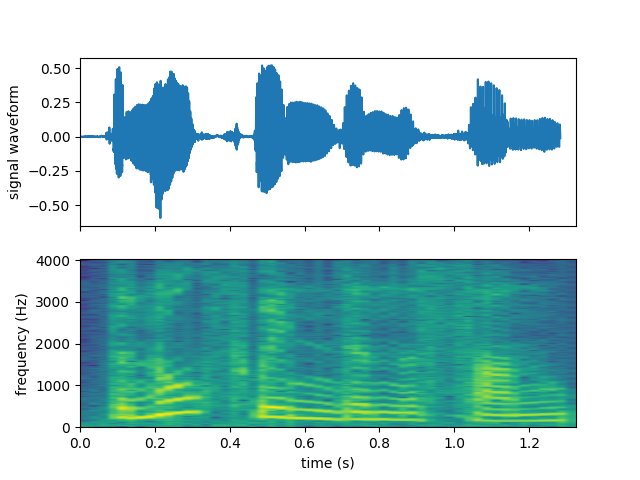

In [1]:
%matplotlib widget

import ffmpegio as ff
import numpy as np

from scipy.signal import ShortTimeFFT, get_window
from matplotlib import pyplot as plt


audiofile = "the_north_wind_and_the_sun.wav"
data = {fs: x[:,0] for fs,x in (ff.audio.read(audiofile, ac=1, ar=fs, sample_fmt="flt" ) for fs in (8000,16000))}

fs = 8000
x = data[fs]

nb_samples = len(x)
t = np.arange(nb_samples) / fs

nperseg = int(0.05 * fs)
SFT = ShortTimeFFT(win=get_window("hamming", nperseg), hop=nperseg // 2, fs=fs)
Sxx_dB = 10 * np.log10(SFT.spectrogram(x))

plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.ylabel("signal waveform")
plt.subplot(2, 1, 2)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
plt.xlabel("time (s)")
_ = plt.ylabel("frequency (Hz)")

In [8]:
# import conf_cuda
import ml_pitch_models as mlf0

models = {model: mlf0.load_model(model, return_f0=True) for model in mlf0.available_models()}

results = {
    name: model.predict(data[model.fs], model.fs) for name, model in models.items()
}


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Text(0.5, 0, 'time (s)')

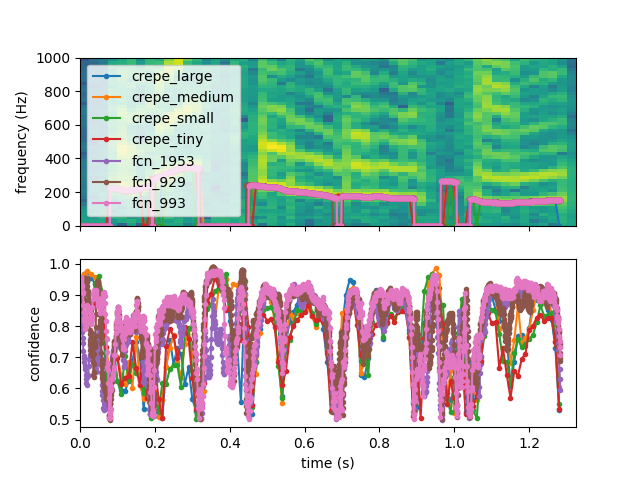

In [10]:
plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
for model, res in results.items():
    plt.plot(*res[:2], ".-", label=model)
plt.ylabel("frequency (Hz)")
plt.ylim([0, 1000])
plt.legend()
plt.subplot(2, 1, 2)
for model, res in results.items():
    plt.plot(res[0], res[-1], ".-", label=model)
plt.ylabel("confidence")
plt.xlabel("time (s)")

Text(0.5, 0, 'time (s)')

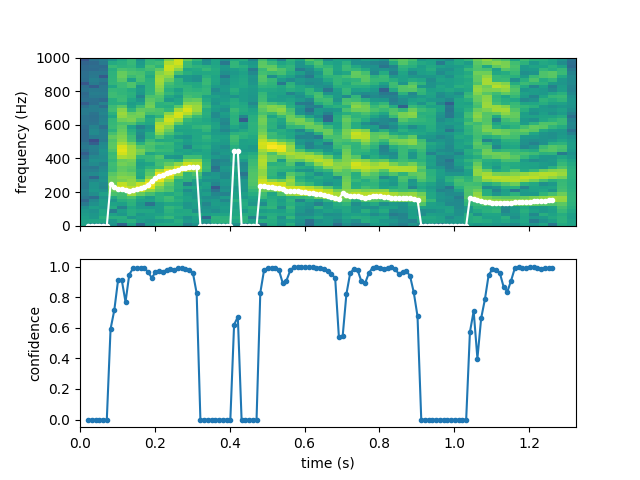

In [3]:
import parselmouth as pm

sound = pm.Sound(x,fs)
pitch = sound.to_pitch()

plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
plt.plot(pitch.ts(), pitch.selected_array['frequency'], ".-w")
plt.ylabel("frequency (Hz)")
plt.ylim([0, 1000])
plt.subplot(2, 1, 2)
plt.plot(pitch.ts(), pitch.selected_array['strength'], ".-")
plt.ylabel("confidence")
plt.xlabel("time (s)")

Text(0.5, 0, 'time (s)')

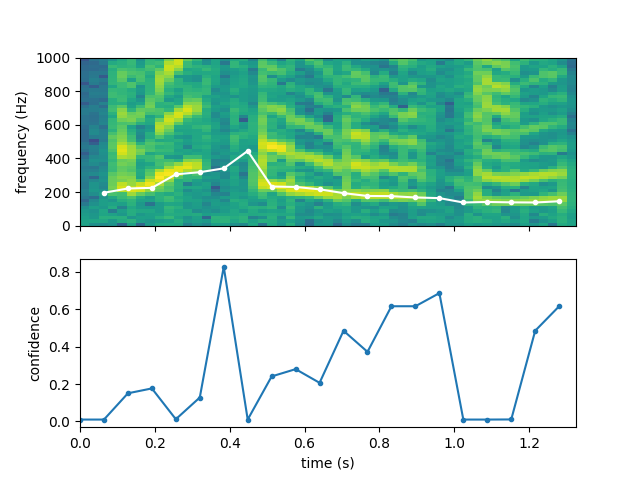

In [4]:
import librosa

f0_lr, _, conf_lr = librosa.pyin(x, fmin=75, fmax=600, sr=fs)
t_lr = librosa.times_like(f0_lr, sr=fs)


plt.subplots(2, 1, sharex=True)
plt.subplot(2, 1, 1)
plt.imshow(Sxx_dB, extent=SFT.extent(nb_samples), aspect="auto", origin="lower")
plt.plot(t_lr, f0_lr, ".-w")
plt.ylabel("frequency (Hz)")
plt.ylim([0, 1000])
plt.subplot(2, 1, 2)
plt.plot(t_lr, conf_lr, ".-")
plt.ylabel("confidence")
plt.xlabel("time (s)")